In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.0 MB/s eta 0:00:00


In [2]:
#performing operations with operators and state vector
import qiskit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
import numpy as np
import math
import random

In [3]:
#performing operation on X,Y,Z,H,S,T
X=Operator(np.array([[0,1],[1,0]])) # Pauli-X (NOT) gate
Y=Operator(np.array([[0,-1j],[1j,0]]))#PAULI-Y GATE
Z=Operator(np.array([[1,0],[0,-1]])) # Pauli-Z gate
H=Operator(np.array([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]])) #hadamard operator
S=Operator(np.array([[1,0],[0,1.0j]]))
T=Operator(np.array([[1,0],[0,(1+1.0j)/math.sqrt(2)]]))#pi/8 operator

state =Statevector([1,0])
print("Initial state |0⟩:", state)
print("X_operator:",X)
print("Y_operator:",Y)
print("Z_operator:",Z)
print("H_operator:",H)
print("S_operator:",S)
print("T_operator:",T)

Initial state |0⟩: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
X_operator: Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))
Y_operator: Operator([[ 0.+0.j, -0.-1.j],
          [ 0.+1.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))
Z_operator: Operator([[ 1.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))
H_operator: Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))
S_operator: Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))
T_operator: Operator([[1.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.70710678+0.70710678j]],
         input_dims=(2,), output_dims=(2,))


In [4]:
#performing operations with operators by evolving
state= state.evolve(X)
print("\nAfter X gate:", state)
state= state.evolve(Y)
print("\nAfter Y gate:", state)
state= state.evolve(Z)
print("\nAfter Z gate:", state)
state= state.evolve(H)
print("\nAfter H gate:", state)
state= state.evolve(H)
print("\nAfter S gate:", state)
state= state.evolve(S)
print("\nAfter T gate:", state)
state= state.evolve(T)


After X gate: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

After Y gate: Statevector([0.-1.j, 0.+0.j],
            dims=(2,))

After Z gate: Statevector([0.-1.j, 0.+0.j],
            dims=(2,))

After H gate: Statevector([0.-0.70710678j, 0.-0.70710678j],
            dims=(2,))

After S gate: Statevector([0.-1.j, 0.+0.j],
            dims=(2,))

After T gate: Statevector([0.-1.j, 0.+0.j],
            dims=(2,))


In [5]:
display(state.draw('text'))

[0.-1.j,0.+0.j]

In [6]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a96ed04d07c9f5052f74de8bf89e5d49b3861ed3e953fdbe3b8bc1b854046364
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


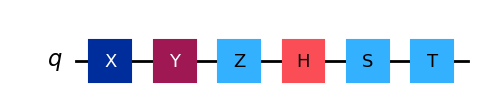

In [7]:
#Draw a simple circuit for these operation.
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)
qc.s(0)
qc.t(0)


display(qc.draw(output="mpl"))

In [8]:
ket0=Statevector([1,0])
ket1=Statevector([0,1])

state=ket0.evolve(qc)
display(state.draw('text'))

[0. -0.70710678j,0.5+0.5j       ]

In [9]:
state = ket1.evolve(qc)
display(state.draw('text'))

[ 0. -0.70710678j,-0.5-0.5j       ]

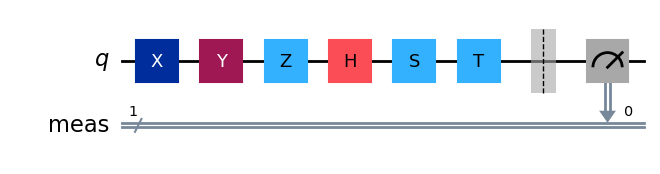

In [10]:
#simulating the measurements
qc.measure_all()
display(qc.draw(output="mpl"))

In [11]:
stat_state=state.sample_counts(10000)
print(stat_state)

{'0': 4952, '1': 5048}


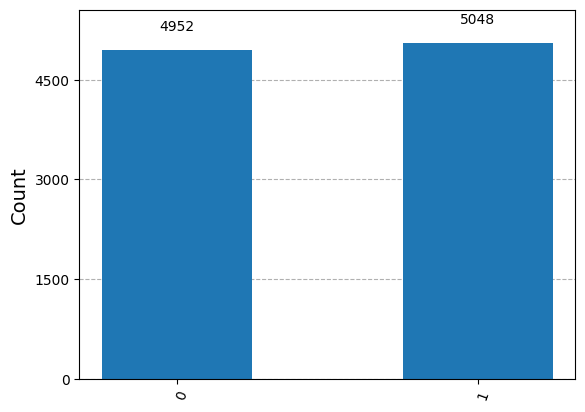

In [12]:
#plotting the states of QUBITS
from qiskit.visualization import plot_histogram
plot_histogram(stat_state)

In [13]:
#Proof that R is square root of NOT  operation. where R is a Hadamard operation, followed by the S operation, followed by another Hadamard operation.
#r^2=X
R=H@S@H
print("R_operator:",R)

R_operator: Operator([[0.5+0.5j, 0.5-0.5j],
          [0.5-0.5j, 0.5+0.5j]],
         input_dims=(2,), output_dims=(2,))


In [14]:
X=np.array([[0,1],[1,0]])
H=np.array([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]])
S=np.array([[1,0],[0,1.0j]])

#calculate H*S
R=np.dot(np.dot(H,S),H)
print("Matrix for R=H*S*H:")
print(R)

R_squared=np.dot(R,R)
print("\nMatrix for R^2:")
print(R_squared)

# Check if  R^2 equals NOT GATE
if np.allclose(R_squared, X):
    print("\nProof: R^2 equals NOT GATE")
else:
    print("\nProof: R^2 does not equal NOT GATE")

Matrix for R=H*S*H:
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]

Matrix for R^2:
[[0.-2.46519033e-32j 1.+0.00000000e+00j]
 [1.+0.00000000e+00j 0.+2.46519033e-32j]]

Proof: R^2 equals NOT GATE
